In [15]:
import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.datasets import load_iris

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import onnxruntime as rt

from onnx.tools.net_drawer import GetPydotGraph, GetOpNodeProducer

import graphviz
from sklearn import tree
from sklearn_pandas import DataFrameMapper
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml
from sklearn.externals.six import StringIO
from IPython.display import Image 
import sklearn.datasets as datasets
import pydotplus
import graphviz
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
#from feature_selector import FeatureSelector
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from mlxtend.feature_selection import ColumnSelector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn2pmml.decoration import ContinuousDomain
from sklearn2pmml.pipeline import PMMLPipeline
from sklearn2pmml import sklearn2pmml

## CS422 Individual Project        SHIQI LIU##
### Abstract ###
In this project, I will build a data model and training the provided data. This project mainly studies the influence of feature selection and analysis the factors of overfit. I find that simple methods are better than complex one in sometimes

### Overview ###
Problem statement: the influence of feature selection and analysis the                    factors of overfit

Relevant Literature: See References

Proposed methodology: PCA, Desicion Tree


#### Reading Data ####

In [16]:
df = pd.read_csv('data_public.csv.gz', compression='gzip', header=0, sep=',',
quotechar='"')
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,31.628960,-4.925617,29.828238,-5.572780,20.129709,7.072373,19.335662,27.283873,9.375416,15.336531,34.086952,-3.845316,-4.195369,18.972837,21.279968,3
1,-24.878420,-12.140354,-0.638120,6.712182,-18.044057,-12.485812,-5.060765,-23.392410,-9.336210,6.583095,-2.530664,-3.626419,-35.546821,-11.784902,-4.100635,2
2,-25.711262,-16.540789,7.450853,4.941910,-18.273375,-13.062138,-7.082651,-17.443779,-8.103270,8.345905,-1.319908,-1.234682,-33.845745,-6.827543,-5.758754,2
3,27.837458,-2.436980,29.479857,-3.360867,14.997228,10.254915,10.530714,27.082219,9.254091,26.860616,29.592860,-2.926678,-4.497271,15.949510,19.642792,3
4,30.520663,-5.017300,24.798154,-4.668743,19.697230,12.570798,13.141632,31.598069,12.120745,16.478925,25.257392,-2.133821,-4.365376,21.024188,18.976706,3


In [17]:
# Cacluate 
df.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,-5.626123e-01,-7.432666e+00,1.069211e+01,-1.298888e+00,-1.715337e+00,-8.376662e+00,2.564679e+00,1.250097e+00,2.308441e+00,8.034096e+00,1.096927e+01,-2.569302e+00,-1.817342e+01,4.714102e+00,7.750275e+00,2.166636e+00
std,2.434552e+01,5.358689e+00,1.391955e+01,6.856531e+00,1.593805e+01,1.329916e+01,9.715908e+00,2.050294e+01,1.182328e+01,9.122371e+00,1.540449e+01,3.264653e+00,1.460082e+01,1.354750e+01,1.286000e+01,6.872945e-01
min,-3.658025e+01,-2.483024e+01,-1.329504e+01,-2.365417e+01,-2.703844e+01,-3.242560e+01,-1.782598e+01,-2.957892e+01,-1.628663e+01,-1.713628e+01,-1.550703e+01,-1.538548e+01,-3.959267e+01,-1.807380e+01,-1.410457e+01,1.000000e+00
25%,-2.190966e+01,-1.199548e+01,3.122246e-01,-5.221629e+00,-1.717748e+01,-1.847365e+01,-5.018479e+00,-1.814894e+01,-8.798066e+00,4.663393e+00,-3.789138e+00,-4.815882e+00,-3.253720e+01,-8.564706e+00,-4.916820e+00,2.000000e+00
50%,-6.043285e+00,-6.841852e+00,2.903836e+00,-2.683514e+00,1.938928e+00,-1.526870e+01,-1.500786e+00,1.556922e+00,1.570005e+00,8.908198e+00,1.042090e+01,-2.917836e+00,-1.345052e+01,7.400789e+00,1.184960e+01,2.000000e+00
75%,3.030517e+01,-3.649784e+00,2.778294e+01,4.777707e+00,1.581311e+01,7.629761e+00,1.298093e+01,2.473866e+01,1.152911e+01,1.475206e+01,2.639554e+01,-6.125631e-01,-4.138239e+00,1.794834e+01,2.048135e+01,3.000000e+00
max,4.609603e+01,1.506701e+01,4.475665e+01,1.402662e+01,2.707671e+01,2.489338e+01,3.268256e+01,4.075752e+01,3.083255e+01,3.400029e+01,4.772271e+01,1.223828e+01,1.163477e+01,3.286069e+01,3.183829e+01,3.000000e+00


In [18]:
x_labels = ['A', 'B','C','D','E','F','G','H','I','J','K','L','M','N','O']
x = pd.DataFrame(data=df.drop('Class', axis=1), columns=x_labels)
y = pd.DataFrame(data=df['Class'], columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
#from onna orginal code
training_data = pd.concat([X_train, y_train], axis=1)
training_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
594365,30.283781,-4.085427,33.119485,-4.042415,16.142156,6.830608,16.897757,27.106804,5.523999,18.761876,27.849962,-3.995913,-6.173083,13.978609,19.387214,3
1188186,-21.706092,-15.013139,0.192316,4.165363,-17.399622,-20.514379,-5.745846,-22.762205,-9.358435,8.385365,-5.928772,-0.681161,-29.386622,-7.521928,-1.035303,2
1000464,33.145881,-6.708953,25.365962,-4.444924,16.150118,8.033968,10.095025,25.580118,10.215897,21.875389,32.681629,1.548873,-5.908473,19.003004,21.623632,3
585646,32.523560,-5.596347,29.210011,-5.596781,17.474273,7.099345,12.940676,30.453534,9.532612,19.482156,30.497834,-1.983212,-6.335520,15.230114,15.912011,3
580554,29.350224,-6.326400,33.271881,-5.578419,15.508452,9.899493,18.915314,30.010852,5.671600,15.986190,27.744882,-1.058114,-2.740162,16.840981,19.905145,3


In [19]:
training_data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000,960000.000000
mean,-0.559440,-7.430408,10.691010,-1.302105,-1.712519,-8.374261,2.565297,1.253893,2.312333,8.034129,10.971091,-2.567557,-18.169273,4.717606,7.754435,2.166526
std,24.343827,5.361432,13.919031,6.855970,15.936750,13.299072,9.715680,20.501657,11.823964,9.124457,15.403122,3.265242,14.601206,13.548684,12.860402,0.687415
min,-36.580247,-23.578893,-13.295041,-23.654167,-27.038437,-32.328167,-16.781584,-29.578916,-16.286628,-17.136276,-15.507032,-15.290534,-39.592672,-18.073797,-14.104568,1.000000
25%,-21.906644,-11.995896,0.310069,-5.223548,-17.176349,-18.471678,-5.018580,-18.147020,-8.796877,4.665658,-3.788796,-4.814598,-32.536305,-8.563747,-4.914594,2.000000
50%,-5.774079,-6.835425,2.903761,-2.786436,2.264210,-15.266215,-1.500477,1.927590,2.057370,8.911844,11.000316,-2.917336,-13.042159,7.958473,12.316365,2.000000
75%,30.302080,-3.645331,27.779078,4.774304,15.812319,7.631317,12.982278,24.741738,11.531681,14.753426,26.393123,-0.608859,-4.135798,17.948175,20.483717,3.000000
max,46.096031,15.067007,44.756654,13.777135,27.076708,24.893380,31.667526,40.757517,30.832548,32.551039,46.776238,12.238276,11.634766,32.860694,30.469308,3.000000


### Data Processing ###

I use PCA method in this project and The goal is to research the influence of feature selection. 

In [20]:
#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(960000, 15) (960000, 1)
(240000, 15) (240000, 1)


[Text(133.92000000000002, 181.2, 'X[14] <= 6.723\ngini = 0.611\nsamples = 960000\nvalue = [160197, 479741, 320062]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 479741\nvalue = [0, 479741, 0]'),
 Text(200.88000000000002, 108.72, 'X[2] <= 11.688\ngini = 0.445\nsamples = 480259\nvalue = [160197, 0, 320062]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 160197\nvalue = [160197, 0, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 320062\nvalue = [0, 0, 320062]')]

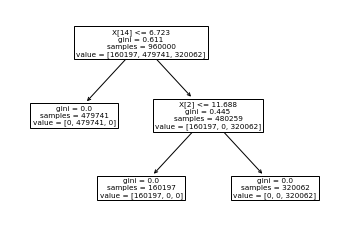

In [21]:
from sklearn import tree
#Defining and fitting a decision tree instance
classifier = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5)
classifier = classifier.fit(X_train, y_train)

#Setting up expectations and prediction
expected = y_test
predicted = classifier.predict(X_test)

#Show a visual representation of the tree
tree.plot_tree(classifier)

In [22]:
from sklearn import metrics
#Look at main classification metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     39906
           2       1.00      1.00      1.00    120090
           3       1.00      1.00      1.00     80004

    accuracy                           1.00    240000
   macro avg       1.00      1.00      1.00    240000
weighted avg       1.00      1.00      1.00    240000



In [23]:
#Creating pca with component 2
pca_two = decomposition.PCA(n_components=2)
pca2_bc_ds = pca_two.fit_transform(df)
pca2_bf = pd.DataFrame(data=pca2_bc_ds, columns=['PCA1', 'PCA2'])
pca2_bf.head()


,PCA1,PCA2
0,64.730623,-9.072456
1,-51.621330,-6.891975
2,-46.249430,-8.308880
3,58.289392,-14.635984
4,62.573190,-8.031994


In [78]:
#Creating pca with component 15
from sklearn import decomposition
pca = decomposition.PCA(n_components=15)
pca_bc_ds = pca.fit_transform(df)
pca_bf = pd.DataFrame(data=pca_bc_ds, columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O'])
pca_bf.head()


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,64.730623,-9.072456,-2.101739,-0.722767,4.455011,4.067850,0.756555,0.000920,-0.716272,0.110319,-0.921819,-0.637406,2.686245,0.550114,-0.372195
1,-51.621330,-6.891975,3.653706,6.178553,2.058584,0.782790,1.067798,0.720557,2.996767,1.231788,-0.683640,-2.618552,0.394976,-0.636441,1.341479
2,-46.249430,-8.308880,2.640916,2.361946,3.683391,-5.079126,5.938575,0.509277,-1.161738,-3.853428,-3.179349,0.011161,-1.740616,-1.151860,-0.127508
3,58.289392,-14.635984,-7.510951,4.223706,-2.171608,-5.474981,2.901977,-3.489359,1.632530,0.832318,1.062731,0.496855,-0.858641,1.647424,1.184892
4,62.573190,-8.031994,1.542023,3.011764,-6.477293,-1.069289,-0.204454,-2.239661,-3.666911,-2.523705,0.013023,1.127561,1.532710,-1.909332,1.111436


In [80]:
from sklearn import model_selection
#Set-up data as samples and features
X = pca_bf
y = y

#Using the train_test_split function to make a split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

#For self usage
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(960000, 15) (960000,)
(240000, 15) (240000,)


In [81]:
#Create functions for the following
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])


In [82]:
pca_test = decomposition.PCA(n_components=15)
pca_test.fit(df.drop('Class', axis=1))

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

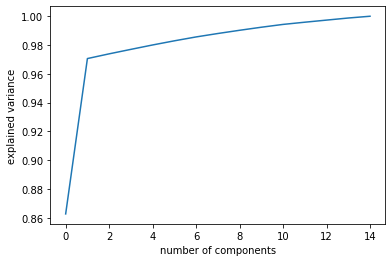

In [83]:
# using graph to show it
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
#named x and y label
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [84]:
array = pca_test.explained_variance_ratio_
array

array([0.86268196, 0.10791724, 0.00328488, 0.00310746, 0.00305648,
       0.00287975, 0.0027037 , 0.00237806, 0.00223939, 0.00212034,
       0.00195871, 0.00152986, 0.00146168, 0.00145054, 0.00122995])

In [85]:
total_array =np.array(df)
print('shape:',total_array[:,0:-1].shape)
labels_count =np.array(df.groupby(by="Class")['Class'].count())
labels_count

shape: (1200000, 15)


array([200103, 599831, 400066])

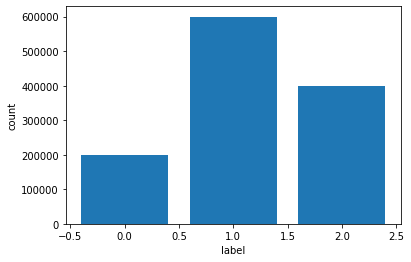

In [123]:
#show it in graph
plt.bar([i*1
        for i in range(len(labels_count))],labels_count)
#named x and y label
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [87]:
x,y = total_array[:,0:-1],total_array[:,-1]

In [88]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
dec_tree = DecisionTreeClassifier(
    criterion ='gini', splitter ='best', min_samples_split=2, min_samples_leaf=1, random_state=2020
                                )


In [89]:
print(X_train.shape)
print(X_test.shape)

(960000, 15)
(240000, 15)


In [90]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2020, splitter='best')

In [91]:
pred = dec_tree.predict(X_test)

In [92]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#confusion matrix
print(confusion_matrix(y_test,pred))


[[ 39916      0      0]
 [     0 120200      0]
 [     0      0  79884]]


In [93]:
#Accuracy
format(accuracy_score(y_test,pred))

'1.0'

In [94]:
#precision
format(precision_score(y_test, pred, average='micro'))

'1.0'

In [95]:
#recall
format(recall_score(y_test,pred,average='micro'))

'1.0'

In [96]:
#f1-score
format(f1_score(y_test,pred,average='micro'))

'1.0'

In [121]:
headers = list(df.columns)[0:-1]
print(dict(zip(headers,dec_tree.feature_importances_)))

{'A': 0.6361262117775891, 'B': 0.3638737882224108, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'O': 0.0}


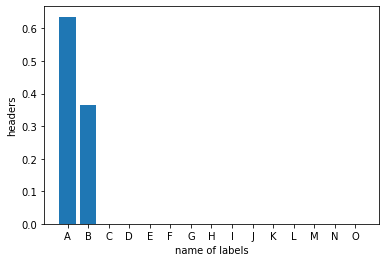

In [124]:
plt.bar(headers,dec_tree.feature_importances_)
#named x and y label
plt.xlabel('name of labels')
plt.ylabel('headers')
plt.show()

## Data Anaylsis ##
Therefore, from the graph we can know that 'A' is the most mainly feature

## Model Training and Validation ##
in this part, I build a final data model to test my problem statement is correct or not. 

In [126]:
#using code from pmml example
final_model = Pipeline([
 ('column_selector', ColumnSelector(cols=['A','B','D'])),
 ('scaler',StandardScaler()),
 ('pca',
 PCA(n_components=1)),
 ('classifier',
 RandomForestClassifier(max_depth=2,n_estimators=100))
 ])

In [129]:
final_model.fit(df,df['Class'])

Pipeline(memory=None,
         steps=[('column_selector',
                 ColumnSelector(cols=['A', 'B', 'D'], drop_axis=False)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=1,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('classifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=2,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fra

## k-folder cross-validation ##

In [130]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = df.columns
# prepare cross validation
kfold = KFold(3, True, 1)
# enumerate splits
for train, test in kfold.split(data):
	print('train: %s, test: %s' % (data[train], data[test]))

train: Index(['A', 'B', 'E', 'F', 'I', 'J', 'L', 'M', 'O', 'Class'], dtype='object'), test: Index(['C', 'D', 'G', 'H', 'K', 'N'], dtype='object')
train: Index(['C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'], dtype='object'), test: Index(['A', 'B', 'E', 'O', 'Class'], dtype='object')
train: Index(['A', 'B', 'C', 'D', 'E', 'G', 'H', 'K', 'N', 'O', 'Class'], dtype='object'), test: Index(['F', 'I', 'J', 'L', 'M'], dtype='object')


## Conclusion ##
I observe that the feature selection method has a significant influence. My project doesn't have an overfit, but I found overfit in my model when I got a wrong which is very complex method in the process. Therefore, I suppose that a complex or flexible algorithm will lead an overfit in most situations.

## Data Source &  Source Code & Bibliography ##
https://machinelearningmastery.com/k-fold-cross-validation/

https://elitedatascience.com/overfitting-in-machine-learning

https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

https://machinelearningmastery.com/k-fold-cross-validation/

http://onnx.ai/sklearn-onnx/pipeline.html#new-converters-in-a-pipeline

In [117]:
#using code from pmml example
from sklearn.feature_selection import SelectKBest
pipeline = PMMLPipeline([
    ('mapper',
     DataFrameMapper([
         (X_train.columns.drop(features[0]).values,
          #[ContinuousDomain(),
           #SimpleImputer(),
           StandardScaler()
          #]
         )
     
     ])),
    ('pca',
     PCA(n_components=15)),
    ('selector',
     SelectKBest(k=2)),
    ('classifier',
     DecisionTreeClassifier())
])
pipeline

#pipeline.fit(training_data.drop(A,axis=1),  training_data['Class']);

PMMLPipeline(steps=[('mapper', DataFrameMapper(default=False, df_out=False,
                features=[(array(['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O'], dtype=object),
                           StandardScaler(copy=True, with_mean=True,
                                          with_std=True))],
                input_df=False, sparse=False)),
       ('pca', PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)),
       ('selector', SelectKBest(k=2, score_func=<function f_classif at 0x1a23ef9b90>)),
       ('classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       rand

In [119]:
pipeline.fit(training_data.drop(features[0],axis=1),  training_data['Class']);

ValueError: n_components=15 must be between 0 and min(n_samples, n_features)=14 with svd_solver='full'

In [145]:
from skl2onnx import convert_sklearn
#type1 = dict([(x, FloatTensorType([1,15])) for x in labels])
#model_onnx = convert_sklearn(final_model, initial_types=list(type1.items()))

ImportError: cannot import name '_check_optimize_result' from 'sklearn.utils.optimize' (/Users/shiqiliu/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py)

In [132]:
from skl2onnx.common.shape_calculator import calculate_linear_classifier_output_shapes
from skl2onnx.operator_converters.RandomForest import convert_sklearn_random_forest_classifier
from skl2onnx import update_registered_converter
update_registered_converter(SGDClassifier, 'SklearnLinearClassifier',
                            calculate_linear_classifier_output_shapes,
                            convert_sklearn_random_forest_classifier)

ModuleNotFoundError: No module named 'skl2onnx'

In [5]:
sepal_features = [0,1]
petal_features = [2,3]

sepal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='mean')),
    ('scaler',
     StandardScaler())
])

petal_transformer = Pipeline(steps=[
    ('imputer',
     SimpleImputer(strategy='median')),
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('sepal',
     sepal_transformer,
     sepal_features),
    ('petal',
     petal_transformer,
     petal_features)
])

classifier = DecisionTreeClassifier()

In [6]:
pipeline = Pipeline([
    ('precprocessor',
     preprocessor),
    ('classifier',
     classifier)
])

pipeline.fit(iris_train.drop('species',axis=1),
             iris_train['species']);

In [7]:
pipeline.predict(X_test)

array([0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 2])

In [8]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_iris_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("iris_pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [9]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("iris_pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [0 0 0 2 2 2 2 0 0 2 0 0 0 1 2 0 1 2 1 1 1 0 0 1 1 0 0 0 1 2]


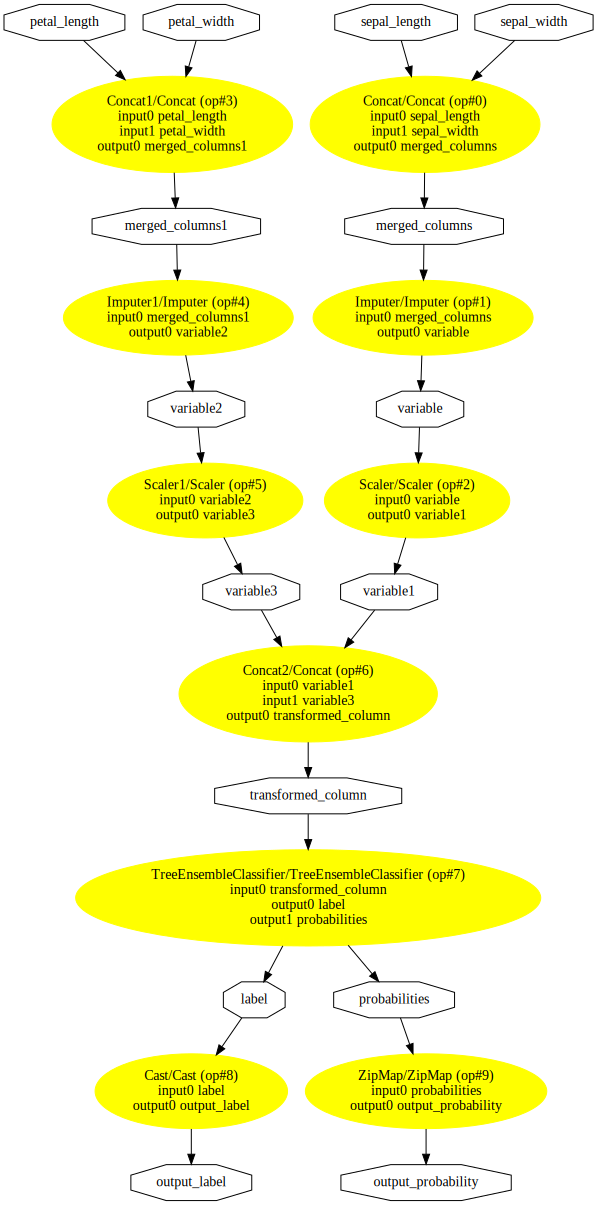

In [10]:
pydot_graph = GetPydotGraph(model_onnx.graph,
                            name=model_onnx.graph.name,
                            rankdir="TB",
                            node_producer=GetOpNodeProducer("docstring",
                                                            color="yellow",
                                                            fillcolor="yellow",
                                                            style="filled"))

graphviz.Source(pydot_graph)